    Optei por mostrar todo o processo (com erros, acertos, dúvidas e frustrações) por demostrar melhor
    o progresso. Ao final separei o código "útil". Mas se você quer acompanhar minha linha de raciocínio,
    só precisa continuar lendo hehe
    

## Agenda
        0 - Requisições
            Como obter dados de todas as páginas?
        1 - Como obter os dados desejados?
            1.1 Primeiros problemas 
            1.2 De volta pro futur--web scraping
                Código nos dados:
                    Preço do apartamento
                    Tamanho do apartamento, número de: Quartos, Banheiros, Vagas para estacionar
        2 - Efetivamente Coletando os dados.
        3 - Otimizando o código
        4 - Criando um arquivo .csv e finalizando a fase 1 do projeto.
            ps: Nunca, mas nunca subestime o retardo humano (-.-' )
        5 - Código final! \(*O*)/


In [98]:
# Pegar os dados da web
import requests
from bs4 import BeautifulSoup

# Dessa vez usei apenas para "confirmar um Erro" rsrs
from urllib.request import urlopen 

# Criar arquivo csv para uso posterior
import pandas as pd

## Requisições 
Para ter acesso às páginas da web com as informações desejadas.

In [2]:
url = "https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?onde=,Pernambuco,Recife,,,,BR%3EPernambuco%3ENULL%3ERecife,-8.05224,-34.92861&transacao=Venda&tipo=Im%C3%B3vel%20usado&pagina=1&ordem=Data%20Atualiza%C3%A7%C3%A3o"

In [3]:
r = requests.get(url)

print(r.text[0:500])

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Access denied | www.zapimoveis.com.br used Cloudflare to restrict access</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8


### Como obter dados de todas as páginas?
**Para saber como acessar todas as páginas do site, comparei as urls das primeiras páginas, e ao encontrar a diferença, posso simplesmente (após pegar os dados de 1 página) iterar sobre as outras.**

A primeira é nitidamente diferente das outras. Como já faria o web scraping dela à parte (para depois automatizar o processo nas outras 282 páginas) não é tão problematico assim.

In [4]:
url_page1 = "https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&onde=,Pernambuco,Recife,,,,BR%3EPernambuco%3ENULL%3ERecife,-8.05224,-34.92861&ordem=Data%20Atualiza%C3%A7%C3%A3o&pagina=1&tipo=Im%C3%B3vel%20usado&transacao=Venda"
url_page2 = "https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&pagina=2&onde=,Pernambuco,Recife,,,,BR%3EPernambuco%3ENULL%3ERecife,-8.05224,-34.92861&transacao=Venda&tipo=Im%C3%B3vel%20usado&ordem=Data%20Atualiza%C3%A7%C3%A3o"
url_page3 = "https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&pagina=3&onde=,Pernambuco,Recife,,,,BR%3EPernambuco%3ENULL%3ERecife,-8.05224,-34.92861&transacao=Venda&tipo=Im%C3%B3vel%20usado&ordem=Data%20Atualiza%C3%A7%C3%A3o"

In [5]:
for url1, url2 in zip (url_page2,url_page3):
    if url1 == url2:
        pass
    else:
        print('url1 --- ',{url1}, '\nurl2 ---',{url2})

url1 ---  {'2'} 
url2 --- {'3'}


## 1 - Como obter os dados desejados?
Ao inspecionar o código fonte da página é possível saber onde cada dados está localizado. Depois disso só precisamos utilizar 
os métodos do bs4 para pegá-los.

Durante esse processo descobri uma url aparentemente "melhor" para se utilizar. Em outras palavras, não precisava ter feito o que fiz acima.

In [6]:
url = "https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&pagina=1"
request = requests.get(url)
print(request.text[0:500])

<!DOCTYPE html>
<!--[if lt IE 7]> <html class="no-js ie6 oldie" lang="en-US"> <![endif]-->
<!--[if IE 7]>    <html class="no-js ie7 oldie" lang="en-US"> <![endif]-->
<!--[if IE 8]>    <html class="no-js ie8 oldie" lang="en-US"> <![endif]-->
<!--[if gt IE 8]><!--> <html class="no-js" lang="en-US"> <!--<![endif]-->
<head>
<title>Access denied | www.zapimoveis.com.br used Cloudflare to restrict access</title>
<meta charset="UTF-8" />
<meta http-equiv="Content-Type" content="text/html; charset=UTF-8


**Passando os dados para um objeto bs4, assim podemos utilizar seus métodos para conseguir as informações que queremos**

In [7]:
soup = BeautifulSoup(request.text, 'html.parser')
soup.text[0:500]

'\n\n\n\n  \n\nAccess denied | www.zapimoveis.com.br used Cloudflare to restrict access\n\n\n\n\n\n\n\n\n\n\n\n\n\nPlease enable cookies.\n\n\n\nError\n1020\nRay ID: 5c0cbfcb4c9df6c7 • 2020-08-10 21:18:24 UTC\n\nAccess denied\n\n\n\n\n\nWhat happened?\nThis website is using a security service to protect itself from online attacks.\n\n\n\n\n\nCloudflare Ray ID: 5c0cbfcb4c9df6c7\n•\nYour IP: 45.224.113.175\n•\nPerformance & security by Cloudflare\n\n\n\n\n\n\n\n'

### 1.1 Primeiros problemas
Como pode ver, não estamos recebendo acesso ao site -.- Por que? Não sei. Pesquisar e descobrir.

In [8]:
print(soup.find('div', class_ = 'simple-card__actions'))

None


In [9]:
soup.find('p')

<p>This website is using a security service to protect itself from online attacks.</p>

**ERROR**

In [10]:
url = "https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&pagina=1"
request = urlopen(url)

HTTPError: HTTP Error 403: Forbidden

In [11]:
request.status_code

403

**Depois de um tempo** encontrei essa resposta.

https://stackoverflow.com/questions/50831469/i-am-not-able-to-scrap-the-web-data-from-the-given-website-using-python

In [12]:
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}
request = requests.get(url, headers=headers)

In [13]:
request.status_code # Successo

200

_"The HTTP 200 OK success status response code indicates that the request has succeeded."_

    Em outras palavras, agora devemos ser capazes de acessar o conteúdo \(*O*)/

In [14]:
soup = BeautifulSoup(request.text, 'html.parser')
print(soup.prettify()[0:500])

<!DOCTYPE html>
<html data-vue-meta-server-rendered="" lang="pt-br">
 <head>
  <meta charset="utf-8" data-vue-meta="ssr"/>
  <meta content="width=device-width, initial-scale=1.0, maximum-scale=5.0" data-vue-meta="ssr" name="viewport"/>
  <meta content="#007aa5" data-vue-meta="ssr" name="theme-color"/>
  <meta content="No ZAP Imóveis você encontra Imóveis à venda em Recife, PE. Confira as melhores ofertas de imóveis à venda e feche ótimos negócios!" data-vue-meta="ssr" name="description"/>
  <met


In [15]:
print(soup.find('div', class_ = 'simple-card__actions'))

<div class="simple-card__actions"><p class="color-dark text-regular simple-card__address" ellipsis="true" ellipsis-lines="1">Rua Eurico de Souza Leão, Cordeiro</p><ul class="feature__container simple-card__amenities"><li class="feature__item text-small js-areas"><span class="icon icon-color--current icon-size--regular"><svg viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/svg"><g fill="none" fill-rule="nonzero"><path d="M0 0h24v24H0z"></path><path d="M2 2h20v20H2z"></path><path d="M5 18V6a1 1 0 00-2 0v13a2 2 0 002 2h13a1 1 0 000-2H6a1 1 0 01-1-1zM19.25 3c.966 0 1.75.784 1.75 1.75v10.5A1.75 1.75 0 0119.25 17H8.75A1.75 1.75 0 017 15.25V4.75C7 3.784 7.784 3 8.75 3zM18 5h-8a1 1 0 00-1 1v8a1 1 0 001 1h8a1 1 0 001-1V6a1 1 0 00-1-1z" fill="currentColor"></path></g></svg></span><span>
        55 - 73 m²
        <!-- --></span></li><li class="feature__item text-small js-bedrooms"><span class="icon icon-color--current icon-size--regular"><svg viewbox="0 0 24 24" xmlns="http://www.w3.org/2000/sv

### 1.2 De volta pro futur--web scraping

Podendo capturar os dados, nos resta descobrir em quais tags do HTML eles se encontram. Como já mencionei, ao inspecionar o código fonte do site descobrimos isso. Agora utilizamos os métodos do objeto bs4 para importamos o que queremos para a memória e efetivamente utilizar.

**Faça funcionar para 1. Depois automatize.**

### Código nos dados 
Para dar uma de cartomante e prever os preços dos apartamentos de Recife precisamos de informações como:
        
        Preço do apartamento
        Localização
        Tamanho
        E quantidade de: Quartos
                         Banheiros
                         Vagas para estacionar
                         
Enquanto o preço é o nosso _label_ <br>
Os outros dados serão nossas _features_. Dados que o modelo de machine learning usará para prever o valor do label.

Vamos atrás de cada um deles individualmente e no fim, juntamos tudo \o\|o|/o/

### Preço do apartamento

Como você vê, não temos exatamente o output que esperávamos, mas isso porque alguns apartamentos ainda estão em construção, então seus valores ainda não foram definidos. **O importante é que conseguimos chegar na tag com a informação**.

In [16]:
apartament_price = soup.find('div', class_ = 'simple-card__prices')
apartament_price.text

'\n    Sob consulta\n  '

obs: caso a [imagem](https://github.com/pauloreis-ds/Projetos/blob/master/Previs%C3%A3o%20-%20Pre%C3%A7o%20Im%C3%B3veis/imagens/Pre%C3%A7o%20Apartamento.JPG) não apareça :/

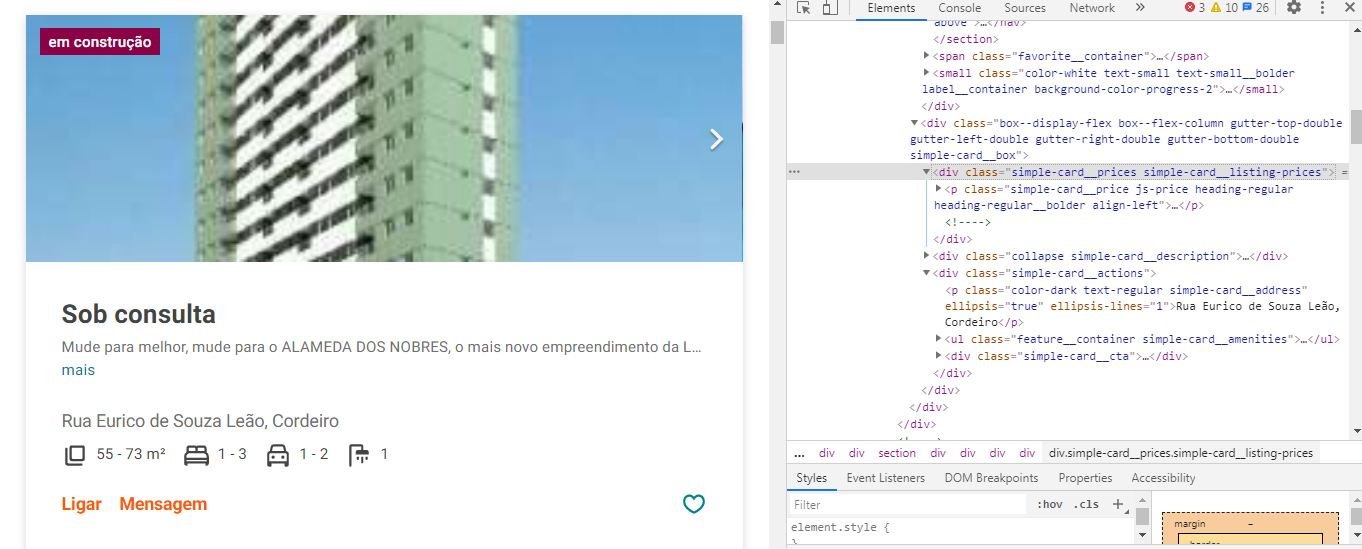

In [17]:
from IPython.display import Image
Image(filename='Preço Apartamento.JPG') 

### Localização
Simples assim :) (por hora)

In [18]:
location = soup.find('div', class_ = 'simple-card__actions')
location.p.text

'Rua Eurico de Souza Leão, Cordeiro'

### Tamanho do apartamento, número de: Quartos, Banheiros, Vagas para estacionar

In [19]:
numerical_set = soup.find('div', class_ = 'simple-card__actions')
numerical_set.ul.text

'\n        55 - 73 m²\n        \n        1 - 3 \n        \n        1 - 2 \n        \n        1 \n        '

In [20]:
apartament_numerical_set = numerical_set.ul.text.split('\n')
apartament_numerical_set

['',
 '        55 - 73 m²',
 '        ',
 '        1 - 3 ',
 '        ',
 '        1 - 2 ',
 '        ',
 '        1 ',
 '        ']

In [21]:
type(apartament_numerical_set)

list

**Aqui vemos que os índices ímpares têm os dados.**

In [22]:
for index in range(len(apartament_numerical_set)):
    print('\nindex -- [', index, ']\n data --', apartament_numerical_set[index].strip())


index -- [ 0 ]
 data -- 

index -- [ 1 ]
 data -- 55 - 73 m²

index -- [ 2 ]
 data -- 

index -- [ 3 ]
 data -- 1 - 3

index -- [ 4 ]
 data -- 

index -- [ 5 ]
 data -- 1 - 2

index -- [ 6 ]
 data -- 

index -- [ 7 ]
 data -- 1

index -- [ 8 ]
 data -- 


In [23]:
size = apartament_numerical_set[1].strip()
rooms = apartament_numerical_set[3].strip()
bathrooms = apartament_numerical_set[5].strip()
parking_lots = apartament_numerical_set[7].strip()

In [24]:
print(size, rooms, bathrooms, parking_lots)

55 - 73 m² 1 - 3 1 - 2 1


## 2 - Efetivamente Coletando os dados
Agora que já sabemos como pegar cada parte necessária, podemos trabalhar para aplicar esse processo em toda a página e, em seguida, nas outras páginas do site.

    ps: ao invés de .find() usamos o find_all() e tratamos all/todas as tags como elementos de uma lista,
        ainda fazendo uso dos métodos do objeto bs4.

In [60]:
apartament_prices = soup.find_all('div', class_ = 'simple-card__prices')
apartament_prices[0:3]

[<div class="simple-card__prices simple-card__listing-prices"><p class="simple-card__price js-price heading-regular heading-regular__bolder align-left"><strong>
     Sob consulta
   </strong></p><!-- --></div>,
 <div class="simple-card__prices simple-card__listing-prices"><p class="simple-card__price js-price heading-regular heading-regular__bolder align-left"><strong>
     Sob consulta
   </strong></p><!-- --></div>,
 <div class="simple-card__prices simple-card__listing-prices"><p class="simple-card__price js-price heading-regular heading-regular__bolder align-left"><strong>
     R$ 262.900
   </strong></p><!-- --></div>]

In [61]:
apartament_prices[3].text 

'\n    R$ 1.700.000\n  '

In [62]:
len(apartament_prices)

24

In [63]:
''' Armazenaremos os dados em listas  '''

price_list = []

for price in range(len(apartament_prices)):
    price_list.append(apartament_prices[price].text)
    
price_list

['\n    Sob consulta\n  ',
 '\n    Sob consulta\n  ',
 '\n    R$ 262.900\n  ',
 '\n    R$ 1.700.000\n  ',
 '\n    R$ 450.000\n  \n      condomínio\n      R$ 460\n      IPTU\n      R$ 1.600',
 '\n    R$ 2.500.000\n  \n      condomínio\n      R$ 1.600',
 '\n    R$ 499.000\n  \n      condomínio\n      R$ 650\n      IPTU\n      R$ 1.500',
 '\n    R$ 350.000\n  \n      condomínio\n      R$ 600\n      IPTU\n      R$ 1.200',
 '\n    R$ 480.000\n  \n      condomínio\n      R$ 445\n      IPTU\n      R$ 180',
 '\n    R$ 280.000\n  \n      condomínio\n      R$ 400',
 '\n    R$ 750.000\n  \n      condomínio\n      R$ 1.760',
 '\n    R$ 320.000\n  \n      condomínio\n      R$ 340\n      IPTU\n      R$ 1.300',
 '\n    R$ 245.000\n  \n      condomínio\n      R$ 450',
 '\n    R$ 4.500\n  ',
 '\n    R$ 680.000\n  \n      condomínio\n      R$ 780\n      IPTU\n      R$ 2.922',
 '\n    R$ 450.000\n  ',
 '\n    R$ 250.000\n  \n      condomínio\n      R$ 700',
 '\n    R$ 317.500\n  \n      condomínio\n     

**Interessante. Informações que não esperava encontrar surgiram. Por hora, ficaremos com elas, até decidirmos como tratá-las**

    De qualquer modo, faremos o mesmo com os outros dados, com exceção que a abordagem será 
    um pouquinho diferente. Mas o conceito é exatamente o mesmo.

In [68]:
numerical_sets = soup.find_all('div', class_ = 'simple-card__actions')
# numerical_sets[0] # Só um já bem grandinho, então não deixarei à mostra aqui

In [79]:
# Dessa maneira temos acesso ao dado
numerical_set[0].ul.text.split('\n')[1]

'        55 - 73 m²'

In [81]:
size_list = []
rooms_list = []
bathrooms_list = []
parking_lots_list = []

for item in range(len(numerical_sets)):
    size_list.append(numerical_set[item].ul.text.split('\n')[1])
    rooms_list.append(numerical_set[item].ul.text.split('\n')[3])
    bathrooms_list.append(numerical_set[item].ul.text.split('\n')[5])
    parking_lots_list.append(numerical_set[item].ul.text.split('\n')[7])

In [84]:
# Deu certo \o\|o|/o/

for s, r, b, p in zip(size_list, rooms_list, bathrooms_list, parking_lots_list):
    print(s, '---', r, '---', b, '---', p)

        55 - 73 m² ---         1 - 3  ---         1 - 2  ---         1 
        111 - 209 m² ---         3  ---         2  ---         3 
        69 m² ---         2  ---         1  ---         1 
        230 m² ---         4  ---         2  ---         5 
        54 m² ---         2  ---         1  ---         2 
        204 m² ---         4  ---         3  ---         5 
        70 m² ---         2  ---         1  ---         2 
        74 m² ---         3  ---         1  ---         3 
        89 m² ---         3  ---         2  ---         3 
        110 m² ---         4  ---         2  ---         3 
        186 m² ---         4  ---         3  ---         4 
        51 m² ---         2  ---         1  ---         2 
        66 m² ---         3  ---         1  ---         2 
        600 m² ---         3  ---         5  ---         1 
        103 m² ---         4  ---         2  ---         3 
        180 m² ---         4  ---         2  ---         2 
        110 m² ---         3 

## 3 - Otimizando o código 
(passando por todas as páginas) Para completar o web scraping e obter todas as features que usaremos no modelo de machine learning.

    Sei que o site tem 282 páginas com informações sobre vendas de apartamento. Acho que 
    poderia criar diretamente um loop e iterar sobre elas, mas decidi criar uma lista de
    urls e iterar sobre ela (o que resultará nos mesmo).

In [89]:
urls = []

for url in range(1, 283):
    urls.append("https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&pagina="+ str(url))

urls[0:3]    

['https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&pagina=1',
 'https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&pagina=2',
 'https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&pagina=3']

**Finalmente, O Grande Finale:**

Esse processo pode demorar um pouco.

In [93]:
# Faz o site saber que somos usuários, ao invés de máquinas hehe
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

In [94]:
# Para armazenar os elementos pegos
price_list = []
size_list = []
rooms_list = []
bathrooms_list = []
parking_lots_list = []

for url in urls:
    # Requerimentos para ter acesso ao conteúdo do site
    request = requests.get(url, headers=headers)
    
    # Nossa forma orientada a objeto de interagir com tal conteúdo 
    soup = BeautifulSoup(request.text, 'html.parser')
    
    # Acessando as tags que contêm os dados 
    apartament_prices = soup.find_all('div', class_ = 'simple-card__prices')
    numerical_sets = soup.find_all('div', class_ = 'simple-card__actions')
    
    # Salvando os dados contidos nas tags nas listas
    for price in range(len(apartament_price)):
        price_list.append(apartament_price[price].text)
    for item in range(len(numerical_sets)):
        size_list.append(numerical_set[item].ul.text.split('\n')[1])
        rooms_list.append(numerical_set[item].ul.text.split('\n')[3])
        bathrooms_list.append(numerical_set[item].ul.text.split('\n')[5])
        parking_lots_list.append(numerical_set[item].ul.text.split('\n')[7])

In [96]:
print(len(price_list), len(size_list), len(rooms_list), len(bathrooms_list), len(parking_lots_list))

6768 6768 6768 6768 6768


## 4 - Criando um arquivo .csv

O _pandas_ nos ajudará com essa tarefa

In [150]:
df = pd.DataFrame(list(zip(price_list, size_list, rooms_list, bathrooms_list, parking_lots_list)), 
               columns =['Preço', 'Tamanho (m2)', 'Número de quartos', 'Número de banheiros',
                        'vagas para estacionar']) 
df.head() 

,Preço,Tamanho (m2),Número de quartos,Número de banheiros,vagas para estacionar
0,\n Sob consulta\n,55 - 73 m²,1 - 3,1 - 2,1
1,\n Sob consulta\n,111 - 209 m²,3,2,3
2,\n R$ 262.900\n,69 m²,2,1,1
3,\n R$ 1.700.000\n,230 m²,4,2,5
4,\n R$ 450.000\n \n condomínio\n ...,54 m²,2,1,2


Agora só precisaríamos converter o DataFrame em um arquivo csv, **Mas Eu Esqueci De Incluir as Localizações!** Então as pegarei separadamente mesmo (para não gastar tanto tempo) e unirei os dados com o DataFrame já formado.

In [128]:
locations = []

for url in urls:
    request = requests.get(url, headers=headers)
    soup = BeautifulSoup(request.text, 'html.parser')
    
    location = soup.find_all('div', class_ = 'simple-card__actions')
    
    for price in range(len(location)):
        locations.append(location[price].text)    

    Ok, por erro meu veio mais que apenas as localidades. Deveria ter feito 
    location[price].p.text ao invés de location[price].text
    Bom, irei corrigir isso no código final. Por hora, podemos resolver assim:

In [147]:
locations[0:3]

['Rua Eurico de Souza Leão, Cordeiro\n        55 - 73 m²\n        \n        1 - 3 \n        \n        1 - 2 \n        \n        1 \n        ',
 'Rua Marquês de Tamandaré, Poço\n        111 - 209 m²\n        \n        3 \n        \n        2 \n        \n        3 \n        ',
 'Rua General Polidoro, Várzea\n        69 m²\n        \n        2 \n        \n        1 \n        \n        1 \n        ']

In [146]:
only_locations = []

for item in range(len(locations)):
    only_locations.append(locations[item].split('\n')[0])

only_locations[0:4]

['Rua Eurico de Souza Leão, Cordeiro',
 'Rua Marquês de Tamandaré, Poço',
 'Rua General Polidoro, Várzea',
 'Avenida Boa Viagem, Recife']

### Finalmente Criando um arquivo csv.

ps: tinha pensado em transformar _only_locations_ em um objeto Série do pandas e anexá-la ao df, mas nesse caso foi mais fácil simplesmente adicioná-la na criação do DataFrame.

In [154]:
df = pd.DataFrame(list(zip(only_locations, price_list, size_list, rooms_list, bathrooms_list, parking_lots_list)), 
               columns =['Localização','Preço', 'Tamanho (m2)', 'Número de quartos', 'vagas para estacionar',
                        'Número de banheiros']) 
df.head()

,Localização,Preço,Tamanho (m2),Número de quartos,vagas para estacionar,Número de banheiros
0,"Rua Eurico de Souza Leão, Cordeiro",\n Sob consulta\n,55 - 73 m²,1 - 3,1 - 2,1
1,"Rua Marquês de Tamandaré, Poço",\n Sob consulta\n,111 - 209 m²,3,2,3
2,"Rua General Polidoro, Várzea",\n R$ 262.900\n,69 m²,2,1,1
3,"Avenida Boa Viagem, Recife",\n R$ 1.700.000\n,230 m²,4,2,5
4,"Avenida Santos Dumont, Aflitos",\n R$ 450.000\n \n condomínio\n ...,54 m²,2,1,2


In [155]:
df.to_csv('Dados Apartamentos.csv')

## 5 - Código final! \\(\*-\*)/

Caso precisasse pegar novas informações (para atualizar os dados por exemplo), esse poderia ser o código utilizado para tal tarefa.
    
        ps: também fiz uns reajustes, não afetam o resultado, mas deixa o código mais limpo.
        (inverter parking_lots_list com bathrooms_list, tinha os listado na ordem errada)

In [ ]:
# Pegar os dados da web
import requests
from bs4 import BeautifulSoup

# Criar arquivo csv para uso posterior
import pandas as pd

In [ ]:
# Criando urls a serem acessadas
urls = []

for url in range(1, 283):
    urls.append("https://www.zapimoveis.com.br/venda/imoveis/pe+recife/?__zt=ctaw%3Ab&pagina="+ str(url))

In [156]:
# Faz o site saber que somos usuários, ao invés de máquinas hehe
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_5) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/50.0.2661.102 Safari/537.36'}

In [157]:
# Para armazenar os elementos pegos
price_list = []
locations = []
size_list = []
rooms_list = []
bathrooms_list = []
parking_lots_list = []

for url in urls:
    # Requerimentos para ter acesso ao conteúdo do site
    request = requests.get(url, headers=headers)
    
    # Nossa forma orientada a objeto de interagir com tal conteúdo 
    soup = BeautifulSoup(request.text, 'html.parser')
    
    # Acessando as tags que contêm os dados 
    apartament_prices = soup.find_all('div', class_ = 'simple-card__prices')
    location = soup.find_all('div', class_ = 'simple-card__actions')
    numerical_sets = soup.find_all('div', class_ = 'simple-card__actions')
    
    # Salvando os dados contidos nas tags nas listas
    for price in range(len(apartament_price)):
        price_list.append(apartament_price[price].text)
    for price in range(len(location)):
        locations.append(location[price].p.text)  
    for item in range(len(numerical_sets)):
        size_list.append(numerical_set[item].ul.text.split('\n')[1])
        rooms_list.append(numerical_set[item].ul.text.split('\n')[3])
        parking_lots_list.append(numerical_set[item].ul.text.split('\n')[5])
        bathrooms_list.append(numerical_set[item].ul.text.split('\n')[7])
        
print("Processo Finalizado!")

Processo Finalizado!


In [159]:
print(len(locations), len(price_list), len(size_list), len(rooms_list), len(bathrooms_list), len(parking_lots_list))

6768 6768 6768 6768 6768 6768


In [160]:
df = pd.DataFrame(list(zip(only_locations, price_list, size_list, rooms_list, bathrooms_list, parking_lots_list)), 
               columns =['Localização','Preço', 'Tamanho (m2)', 'Número de quartos', 'Número de banheiros',
                        'vagas para estacionar']) 
df.head()

,Localização,Preço,Tamanho (m2),Número de quartos,Número de banheiros,vagas para estacionar
0,"Rua Eurico de Souza Leão, Cordeiro",\n Sob consulta\n,55 - 73 m²,1 - 3,1,1 - 2
1,"Rua Marquês de Tamandaré, Poço",\n Sob consulta\n,111 - 209 m²,3,3,2
2,"Rua General Polidoro, Várzea",\n R$ 262.900\n,69 m²,2,1,1
3,"Avenida Boa Viagem, Recife",\n R$ 1.700.000\n,230 m²,4,5,2
4,"Avenida Santos Dumont, Aflitos",\n R$ 450.000\n \n condomínio\n ...,54 m²,2,2,1


In [161]:
df.to_csv('Dados Apartamentos.csv')

**Fim da fase 1 - Web Scraping Completo!**